In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the Dataset

In [334]:
df = pd.read_excel(r'E Commerce Dataset.xlsx','E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Data Exploration

In [335]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [337]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# Cleaning

In [338]:
# Number of missing values
num_null = df.isnull().sum()

# percentage null values
pct_null = round((num_null/df.shape[0] * 100), 2)

# Create dataframe for number of null value and percentage of null values
df_null = pd.DataFrame({
    'Null Values':num_null,
    'Percentage':pct_null}).reset_index()

# Rename column index to Feature 
df_null.rename(columns={'index':'Features'}, inplace=True)

# Filter only features with null values and sort as descending
df_null = df_null[df_null['Null Values'] > 0].sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,DaySinceLastOrder,307,5.45
1,OrderAmountHikeFromlastYear,265,4.71
2,Tenure,264,4.69
3,OrderCount,258,4.58
4,CouponUsed,256,4.55
5,HourSpendOnApp,255,4.53
6,WarehouseToHome,251,4.46


In [339]:
# df = df.drop('CustomerID', axis=1) #dikarenakan semuanya unik 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

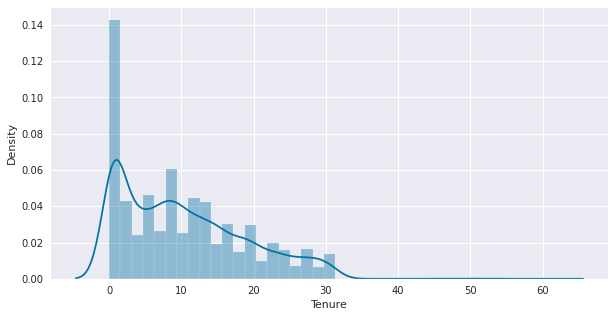

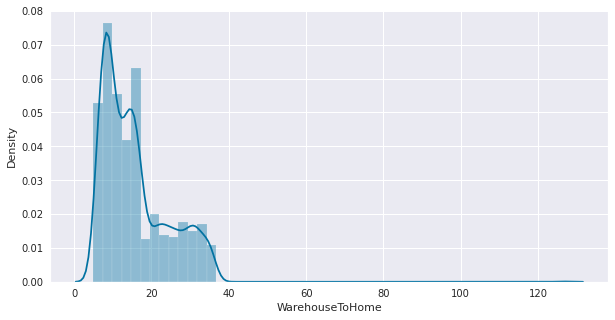

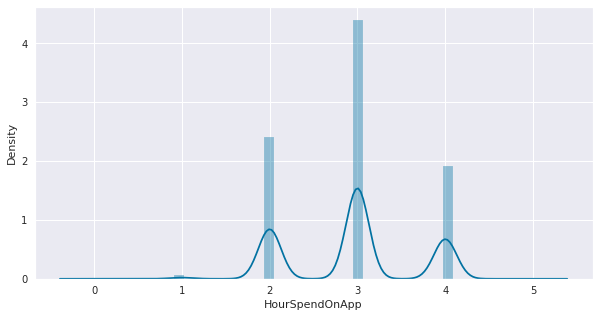

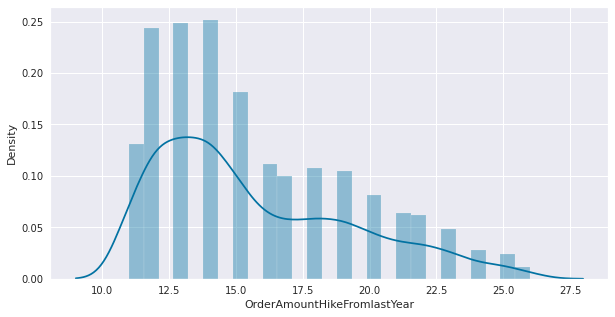

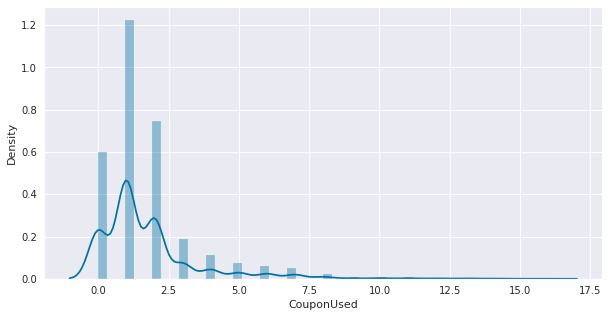

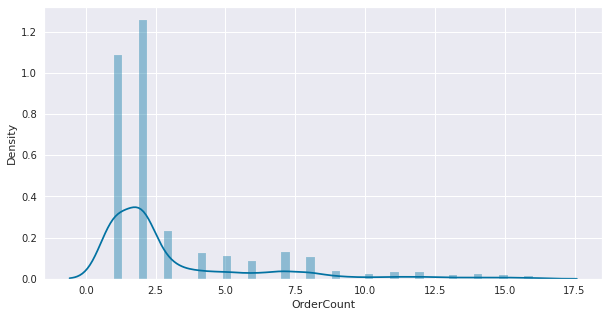

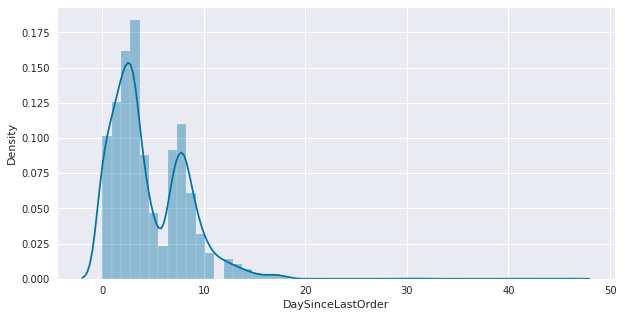

In [340]:
sample= df[['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear',\
   'CouponUsed','OrderCount','DaySinceLastOrder']]

for column in sample.columns:
    plt.figure(figsize=(10,5))   
    sns.distplot(df[column])

In [341]:
df = df.fillna(df.median()) #karena distribusinya skewnes
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [342]:
df.duplicated().sum()
# df.drop_duplicates(inplace=True)
# print(data.duplicated().sum())

0

In [343]:
# Convert data type to integer
df['Churn'] = df['Churn'].astype('int64') 
df['Tenure'] = df['Tenure'].astype('int64')
df['CityTier'] = df['CityTier'].astype('int64')
df['WarehouseToHome'] = df['WarehouseToHome'].astype('int64')
df['HourSpendOnApp'] = df['HourSpendOnApp'].astype('int64')
df['NumberOfDeviceRegistered'] = df['NumberOfDeviceRegistered'].astype('int64')
df['NumberOfAddress'] = df['NumberOfAddress'].astype('int64')
df['Complain'] = df['Complain'].astype('int64')
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].astype('int64')
df['CouponUsed'] = df['CouponUsed'].astype('int64')
df['OrderCount'] = df['OrderCount'].astype('int64')
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype('int64')
df['CashbackAmount'] = df['CashbackAmount'].astype('int64')
df['SatisfactionScore'] = df['SatisfactionScore'].astype('int64')

In [344]:
# Check inconsistent data
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 CustomerID [50001 50002 50003 ... 55628 55629 55630]
 Churn [1 0]
 Tenure [ 4  9  0 13 11 19 20 14  8 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]
 PreferredLoginDevice ['Mobile Phone' 'Phone' 'Computer']
 CityTier [3 1 2]
 WarehouseToHome [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  27
  17  23  33  19  35  24  16  25  32  34   5  21 126   7  36 127]
 PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
 Gender ['Female' 'Male']
 HourSpendOnApp [3 2 1 0 4 5]
 NumberOfDeviceRegistered [3 4 5 2 1 6]
 PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
 SatisfactionScore [2 3 5 4 1]
 MaritalStatus ['Single' 'Divorced' 'Married']
 NumberOfAddress [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
 Complain [1 0]
 OrderAmountHikeFromlastYear [11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26]
 CouponUsed [ 1  0  4  2  9  6 11  7 12 10  5  3 13 15  8

In [345]:
df= df.replace(['Mobile','Phone','CC','COD'],['Mobile Phone','Mobile Phone','Credit Card','Cash on Delivery'])

In [346]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,50005,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10,Computer,1,30,Credit Card,Male,3,2,Laptop & Accessory,1,Married,6,0,18,1,2,4,150
5626,55627,0,13,Mobile Phone,1,13,Credit Card,Male,3,5,Fashion,5,Married,6,0,16,1,2,3,224
5627,55628,0,1,Mobile Phone,1,11,Debit Card,Male,3,2,Laptop & Accessory,4,Married,3,1,21,1,2,4,186
5628,55629,0,23,Computer,3,9,Credit Card,Male,4,5,Laptop & Accessory,4,Married,4,0,15,2,2,9,178


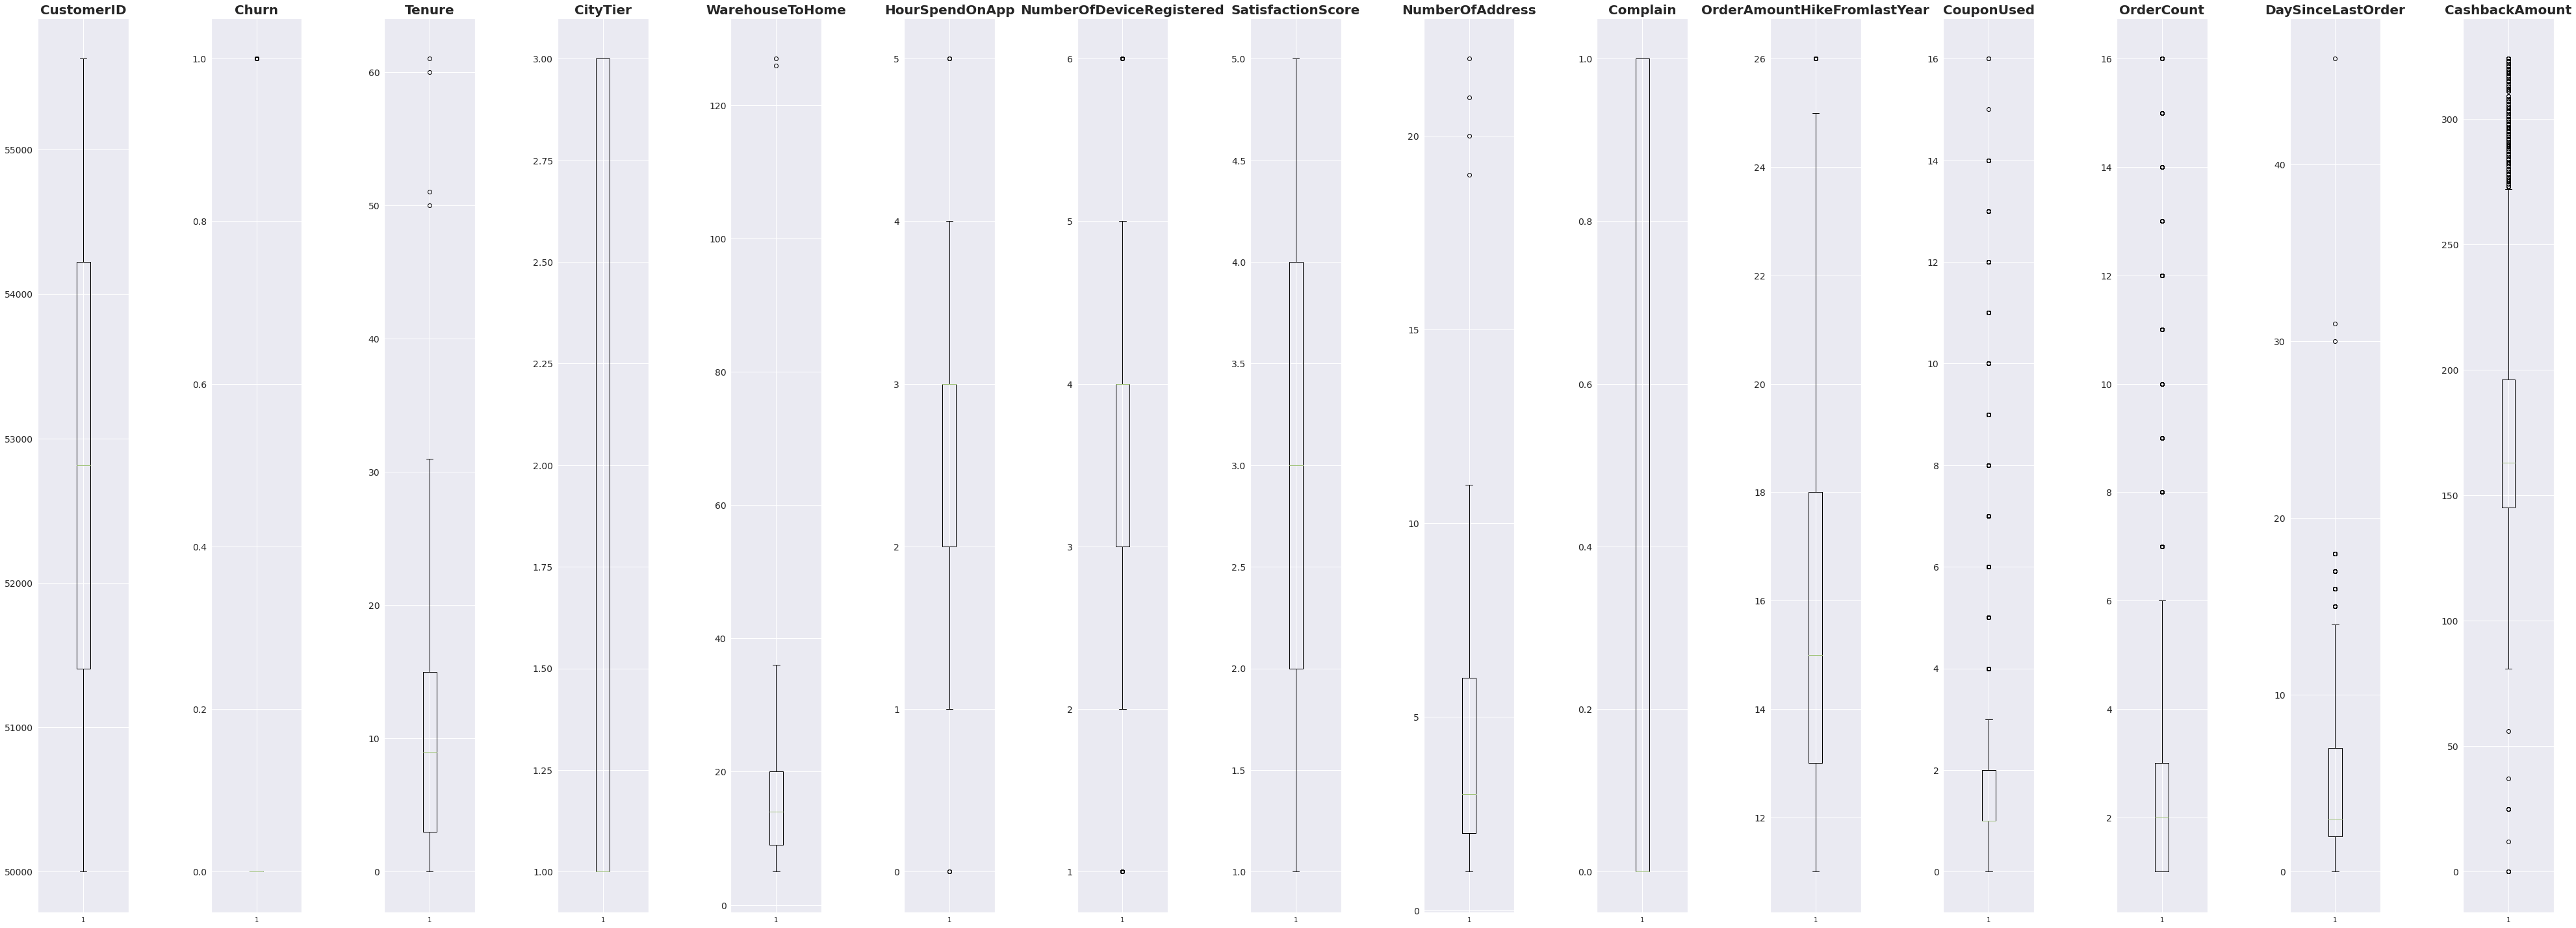

In [347]:
# outliers check using boxplot
numerical= df.drop(['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat',\
                  'MaritalStatus'], axis=1)

feature = numerical
fig, axs = plt.subplots(1, len(feature.columns), figsize=(55,20))
for i, ax in enumerate(axs.flat):
#     plt.subplot(1, len(num), i+1)
    ax.boxplot(feature.iloc[:,i])
    ax.set_title(feature.columns[i], fontsize=20, fontweight= 'bold')
    ax.tick_params(axis="y", labelsize= 14)
plt.tight_layout()
plt.show()

Data shape sebelum di hilangkan outliers (5630, 20)
Data shape setelah handling outliers (4588, 20)


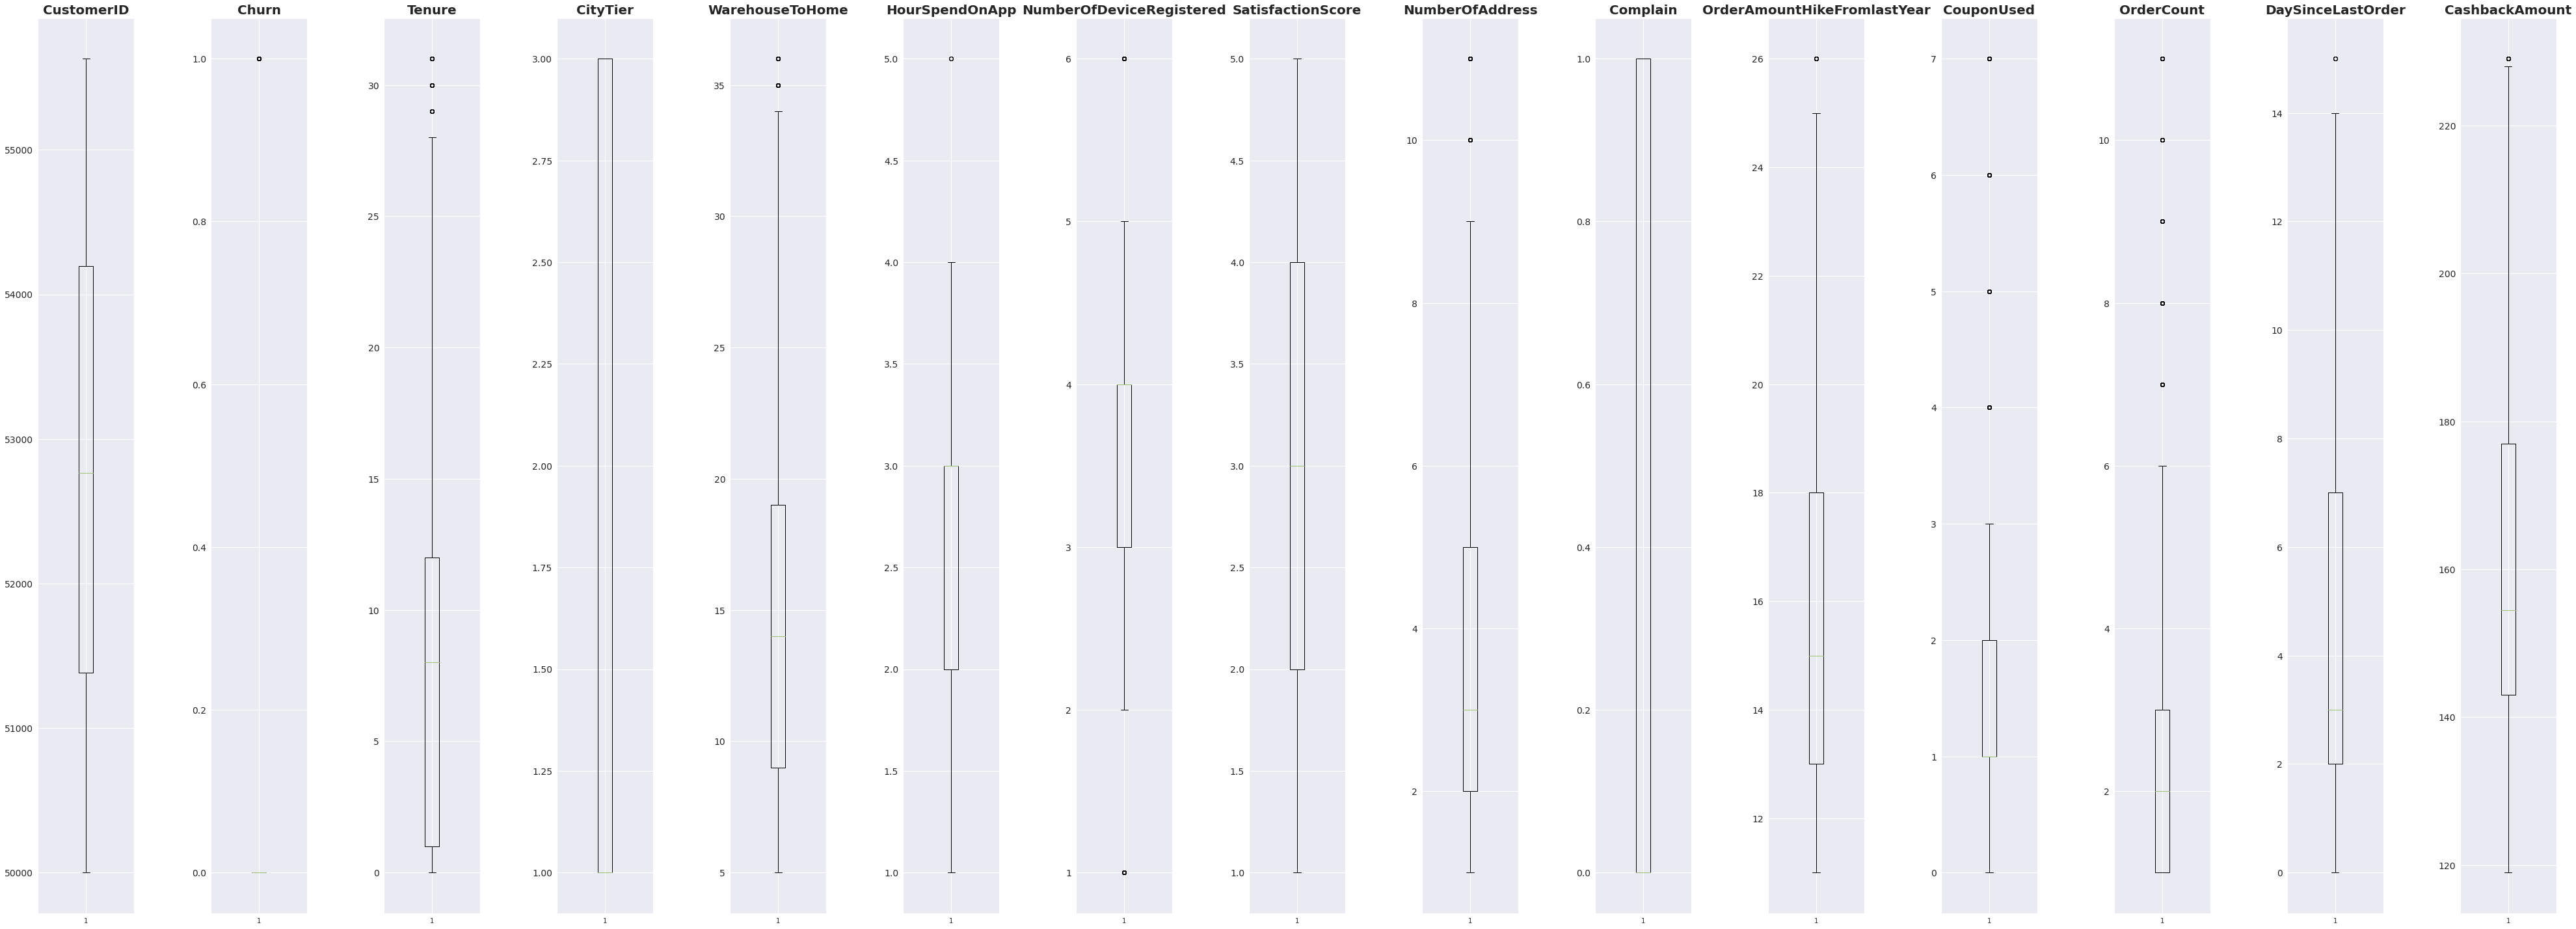

In [348]:
##Remove outlier
# z-score
num = df.select_dtypes('number').columns
z = np.abs(stats.zscore(df[num]))

# Data dimension before handling outliers
print("Data shape sebelum di hilangkan outliers {}".format(df.shape))

# Handling outliers using z_score with treshold = 3
df= df[(z <3).all(axis=1)]
df= df[(np.abs(stats.zscore(df['CashbackAmount'])) <1.2)]

# Data dimension after handling outliers
print("Data shape setelah handling outliers {}".format(df.shape))

feature = df.drop(['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat',\
                  'MaritalStatus'], axis=1)
fig, axs = plt.subplots(1, len(feature.columns), figsize=(55,20))
for i, ax in enumerate(axs.flat):
#     plt.subplot(1, len(num), i+1)
    ax.boxplot(feature.iloc[:,i])
    ax.set_title(feature.columns[i], fontsize=20, fontweight= 'bold')
    ax.tick_params(axis="y", labelsize= 14)
plt.tight_layout()
plt.show()

In [349]:
df.shape

(4588, 20)

# Exploratory Data Analysis

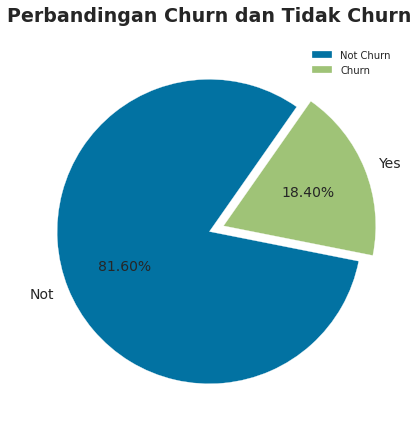

   feature  Total  % Values
0        0   3744      81.6
1        1    844      18.4


In [350]:
plt.figure(figsize=(7,7))
explode = (0, 0.1)
plt.pie(df['Churn'].value_counts(),textprops={'fontsize': 14},explode=explode, startangle=55,labels=['Not','Yes'],autopct='%.2f%%')
plt.title('Perbandingan Churn dan Tidak Churn',fontsize=19,fontweight='bold',pad=20)
plt.legend(['Not Churn','Churn'])
plt.show()
total = df['Churn'].value_counts()
persen = df['Churn'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

Berdasarkan diagram lingkaran diatas menunjukan bahwa 82,95% dari 5630 customer memilih tidak churn dan sisanya 18,41% memilih untuk churn

   feature  Total  % Values
1        1    479     56.75
3        3    319     37.80
2        2     46      5.45


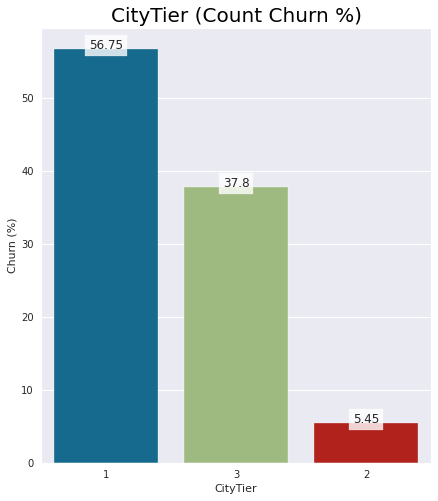

In [351]:
cat_pct1 = df[df['Churn'] == 1] 
cat_pct = cat_pct1['CityTier'].value_counts(normalize=True).reset_index()
cat_pct.columns = ['CityTier', 'Churn']
cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)
cat_pct.sort_values('Churn', ascending=False, inplace=True)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))

x=cat_pct['CityTier']
y=cat_pct['Churn']
fig,ax= plt.subplots(figsize=(7,8))
ax = sns.barplot(x='CityTier',y='Churn',data= cat_pct, order = cat_pct['CityTier'])
addlabels(x, y)
plt.ylabel("Churn (%)")
ax.set_title('CityTier (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

total = cat_pct1['CityTier'].value_counts()
persen = cat_pct1['CityTier'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

dari ketiga tingkatan kota tersebut,tingkatan kota 3 merupakan persentase terbesar customer memilih churn yaitu '....'

In [352]:
df['CityTier'].value_counts()

1    2951
3    1439
2     198
Name: CityTier, dtype: int64

Text(0.5, 1.0, 'City Tier (Churn %)')

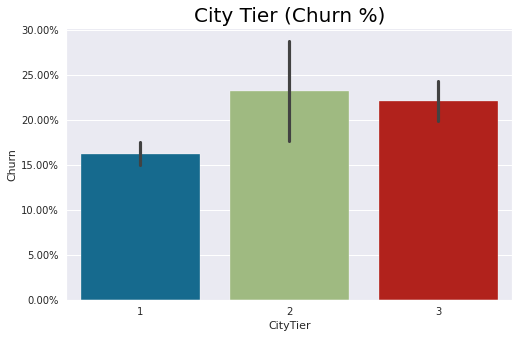

In [353]:
fig,ax= plt.subplots(figsize=(8,5))
ax = sns.barplot( x='CityTier',y= 'Churn',data=df)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('City Tier (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

  feature  Total   % values
0     >20    246  29.146919
1   10-20    367  43.483412
2     <10    231  27.369668


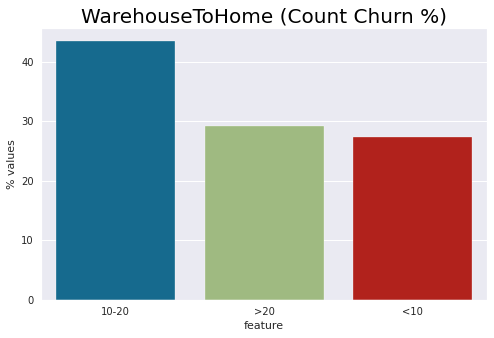

In [418]:
col = 'WarehouseToHome'
cat_pct = df[df['Churn'] == 1] 
cat_pct = cat_pct[col].value_counts().reset_index()
cat_pct.columns = [col, 'Churn']
cat_pct.sort_values('Churn', ascending=False, inplace=True)

cat_pct['distance'] = np.select([cat_pct['WarehouseToHome'] > 20,
                                cat_pct['WarehouseToHome'] > 10,
                                cat_pct['WarehouseToHome'] <= 10],
                               ['>20','10-20',  '<10'])
cat_pct1 = cat_pct[cat_pct['distance'] == '>20']
cat_pct1 = cat_pct1['Churn'].sum()
cat_pct2 = cat_pct[cat_pct['distance'] == '10-20']
cat_pct2 = cat_pct2['Churn'].sum()
cat_pct3 = cat_pct[cat_pct['distance'] == '<10']
cat_pct3 = cat_pct3['Churn'].sum()
total = cat_pct1,cat_pct2,cat_pct3
persen = total / sum(total) * 100
df_hasil = pd.DataFrame({
'feature':choices,
'Total':total,
'% values':persen})
choices    = ['>20','10-20', '<10']
x=choices
y=total

fig,ax= plt.subplots(figsize=(8,5))
ax = sns.barplot( x='feature',y='% values',data=df_hasil, order=['10-20','>20','<10'])
ax.set_title('WarehouseToHome (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
print(df_hasil)

Text(0.5, 1.0, 'WarehouseToHome (Churn %)')

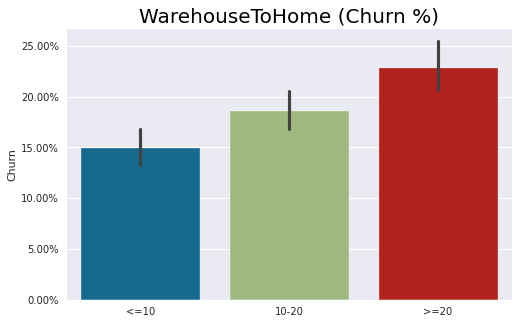

In [355]:
col = 'WarehouseToHome'
conditions = [df[col] <= 10, (df[col] >10) & (df[col] < 20), df[col] >= 20]
choices    = ['<=10','10-20', ">=20"]
data = np.select(conditions, choices, default=np.nan)

fig,ax= plt.subplots(figsize=(8,5))
order = df.groupby([data])["Churn"].mean().sort_values().index
ax = sns.barplot( x= data ,y='Churn',data=df, order=order)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('WarehouseToHome (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

                           feature  Total  % Values
Debit Card              Debit Card    307     36.37
Credit Card            Credit Card    229     27.13
Cash on Delivery  Cash on Delivery    120     14.22
E wallet                  E wallet    118     13.98
UPI                            UPI     70      8.29


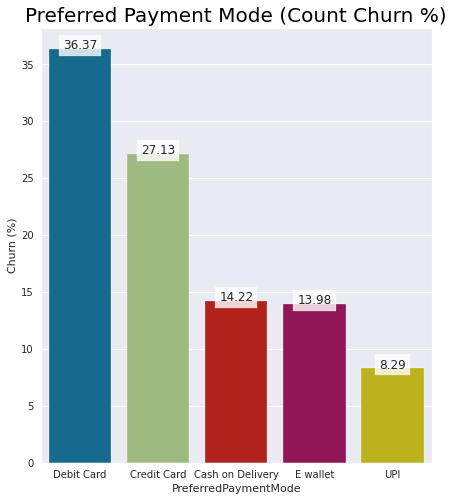

In [356]:
cat_pct1 = df[df['Churn'] == 1] 
cat_pct = cat_pct1['PreferredPaymentMode'].value_counts(normalize=True).reset_index()
cat_pct.columns = ['PreferredPaymentMode', 'Churn']
cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)
cat_pct.sort_values('Churn', ascending=False, inplace=True)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))

x=cat_pct['PreferredPaymentMode']
y=cat_pct['Churn']
fig,ax= plt.subplots(figsize=(7,8))
ax = sns.barplot(x='PreferredPaymentMode',y='Churn',data= cat_pct, order = cat_pct['PreferredPaymentMode'])
addlabels(x, y)
plt.ylabel("Churn (%)")
ax.set_title('Preferred Payment Mode (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
total = cat_pct1['PreferredPaymentMode'].value_counts()
persen = cat_pct1['PreferredPaymentMode'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

Text(0.5, 1.0, 'Preferred Payment Mode (Churn %)')

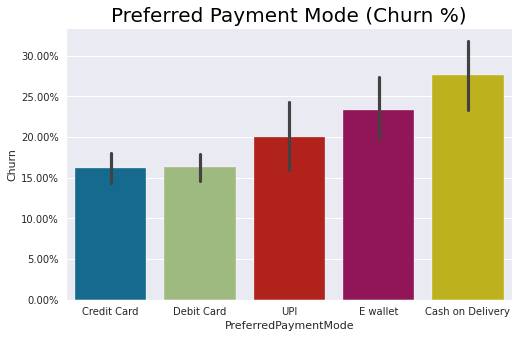

In [357]:
fig,ax= plt.subplots(figsize=(8,5))
order = df.groupby(["PreferredPaymentMode"])["Churn"].mean().sort_values().index
ax = sns.barplot(x='PreferredPaymentMode',y='Churn',data= df, order = order)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('Preferred Payment Mode (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

   feature  Total  % Values
3        3    263     31.16
5        5    240     28.44
4        4    158     18.72
1        1    121     14.34
2        2     62      7.35


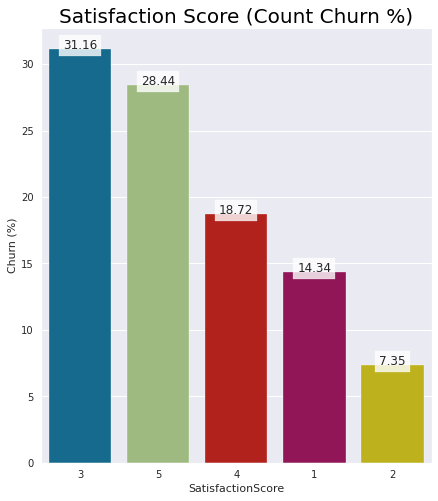

In [358]:
cat_pct1 = df[df['Churn'] == 1] 
cat_pct = cat_pct1['SatisfactionScore'].value_counts(normalize=True).reset_index()
cat_pct.columns = ['SatisfactionScore', 'Churn']
cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))

x=cat_pct['SatisfactionScore']
y=cat_pct['Churn']
fig,ax= plt.subplots(figsize=(7,8))
ax = sns.barplot(x='SatisfactionScore',y='Churn',data= cat_pct, order = cat_pct['SatisfactionScore'])
addlabels(x, y)
plt.ylabel("Churn (%)")
ax.set_title('Satisfaction Score (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
total = cat_pct1['SatisfactionScore'].value_counts()
persen = cat_pct1['SatisfactionScore'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

Text(0.5, 1.0, 'SatisfactionScore (Churn %)')

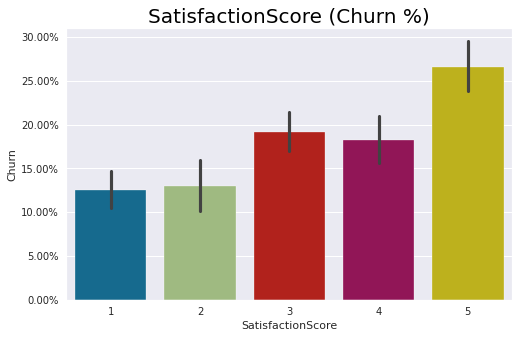

In [359]:
fig,ax= plt.subplots(figsize=(8,5))
ax = sns.barplot( x='SatisfactionScore',y='Churn',data=df)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('SatisfactionScore (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

   feature  Total  % Values
1        1    456     54.03
0        0    388     45.97


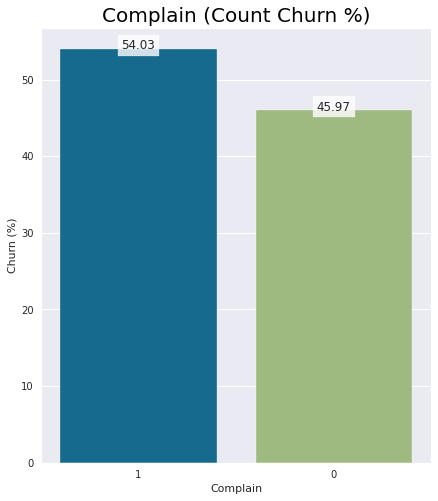

In [360]:
cat_pct1 = df[df['Churn'] == 1] 
cat_pct = cat_pct1['Complain'].value_counts(normalize=True).reset_index()
cat_pct.columns = ['Complain', 'Churn']
cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))

x=cat_pct['Complain']
y=cat_pct['Churn']
fig,ax= plt.subplots(figsize=(7,8))
ax = sns.barplot(x='Complain',y='Churn',data= cat_pct, order = cat_pct['Complain'])
addlabels(x, y)
plt.ylabel("Churn (%)")
ax.set_title('Complain (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
total = cat_pct1['Complain'].value_counts()
persen = cat_pct1['Complain'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

Text(0.5, 1.0, 'Complain (Churn %)')

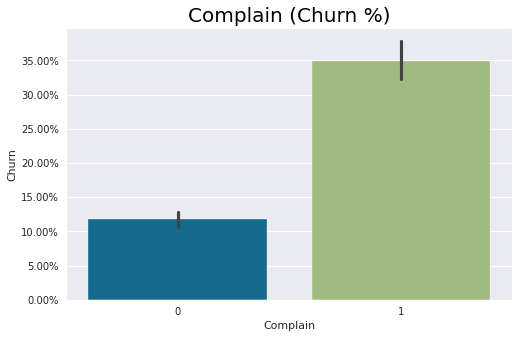

In [361]:
fig,ax= plt.subplots(figsize=(8,5))
order = df.groupby(["Complain"])["Churn"].mean().sort_values().index
ax = sns.barplot(x='Complain',y='Churn',data= df, order = order)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('Complain (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

       feature  Total  % Values
Male      Male    530      62.8
Female  Female    314      37.2


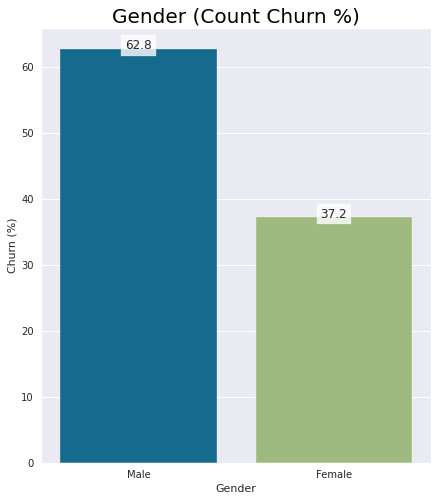

In [364]:
cat_pct1 = df[df['Churn'] == 1] 
cat_pct = cat_pct1['Gender'].value_counts(normalize=True).reset_index()
cat_pct.columns = ['Gender', 'Churn']
cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))

x=cat_pct['Gender']
y=cat_pct['Churn']
fig,ax= plt.subplots(figsize=(7,8))
ax = sns.barplot(x='Gender',y='Churn',data= cat_pct, order = cat_pct['Gender'])
addlabels(x, y)
plt.ylabel("Churn (%)")
ax.set_title('Gender (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
total = cat_pct1['Gender'].value_counts()
persen = cat_pct1['Gender'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

Text(0.5, 1.0, 'Gender (Churn %)')

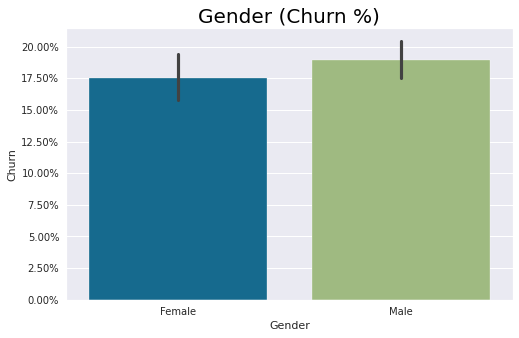

In [365]:
fig,ax= plt.subplots(figsize=(8,5))
ax = sns.barplot( x='Gender',y='Churn',data=df)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('Gender (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

           feature  Total  % Values
Single      Single    419     49.64
Married    Married    316     37.44
Divorced  Divorced    109     12.91


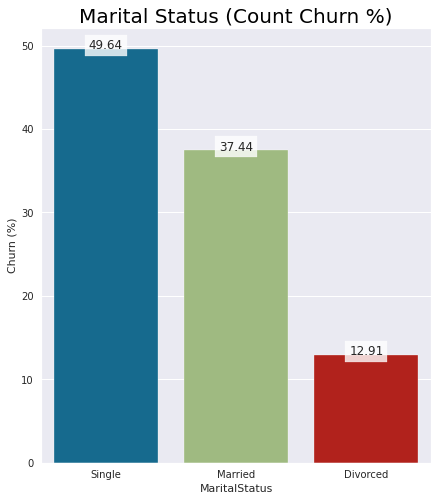

In [366]:
cat_pct1 = df[df['Churn'] == 1] 
cat_pct = cat_pct1['MaritalStatus'].value_counts(normalize=True).reset_index()
cat_pct.columns = ['MaritalStatus', 'Churn']
cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))

x=cat_pct['MaritalStatus']
y=cat_pct['Churn']
fig,ax= plt.subplots(figsize=(7,8))
ax = sns.barplot(x='MaritalStatus',y='Churn',data= cat_pct, order = cat_pct['MaritalStatus'])
addlabels(x, y)
plt.ylabel("Churn (%)")
ax.set_title('Marital Status (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
total = cat_pct1['MaritalStatus'].value_counts()
persen = cat_pct1['MaritalStatus'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

Text(0.5, 1.0, 'MaritalStatus (Churn %)')

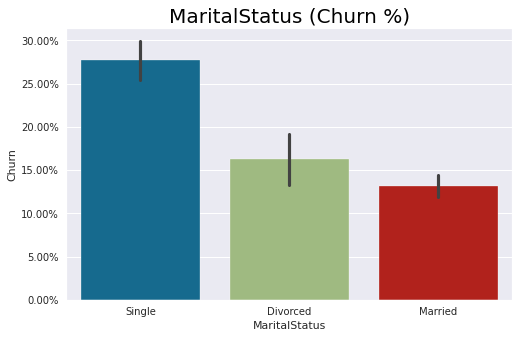

In [367]:
fig,ax= plt.subplots(figsize=(8,5))
ax = sns.barplot( x='MaritalStatus',y='Churn',data=df)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('MaritalStatus (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

                   feature  Total  % Values
Mobile Phone  Mobile Phone    558     66.11
Computer          Computer    286     33.89


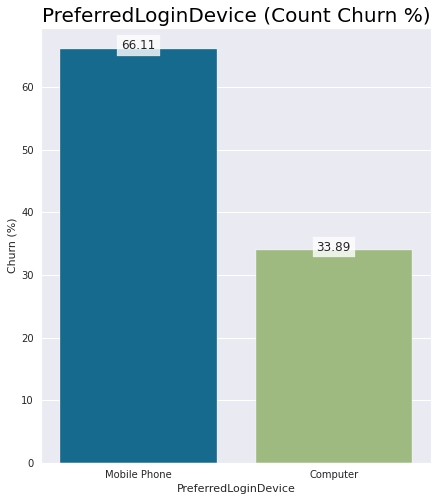

In [368]:
cat_pct1 = df[df['Churn'] == 1] 
cat_pct = cat_pct1['PreferredLoginDevice'].value_counts(normalize=True).reset_index()
cat_pct.columns = ['PreferredLoginDevice', 'Churn']
cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))

x=cat_pct['PreferredLoginDevice']
y=cat_pct['Churn']
fig,ax= plt.subplots(figsize=(7,8))
ax = sns.barplot(x='PreferredLoginDevice',y='Churn',data= cat_pct, order = cat_pct['PreferredLoginDevice'])
addlabels(x, y)
plt.ylabel("Churn (%)")
ax.set_title('PreferredLoginDevice (Count Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
total = cat_pct1['PreferredLoginDevice'].value_counts()
persen = cat_pct1['PreferredLoginDevice'].value_counts(normalize=True)
df_hasil = pd.DataFrame({
'feature':total.index,
'Total':total.values,
'% Values':round((persen * 100),2)})
print(df_hasil)

Text(0.5, 1.0, 'PreferredLoginDevice (Churn %)')

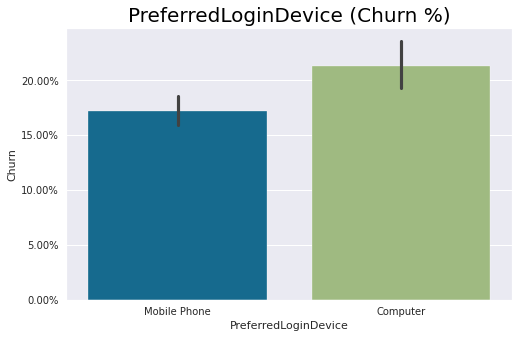

In [369]:
fig,ax= plt.subplots(figsize=(8,5))
ax = sns.barplot( x='PreferredLoginDevice',y='Churn',data=df)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title('PreferredLoginDevice (Churn %)', fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})

# Feature Engineering

In [370]:
df = df.drop('CustomerID', axis=1) #dikarenakan semuanya unik

In [371]:
from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['MaritalStatus'] = LabelEncoder().fit_transform(df['MaritalStatus'])
df['PreferredLoginDevice'] = LabelEncoder().fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode'] = LabelEncoder().fit_transform(df['PreferredPaymentMode'])


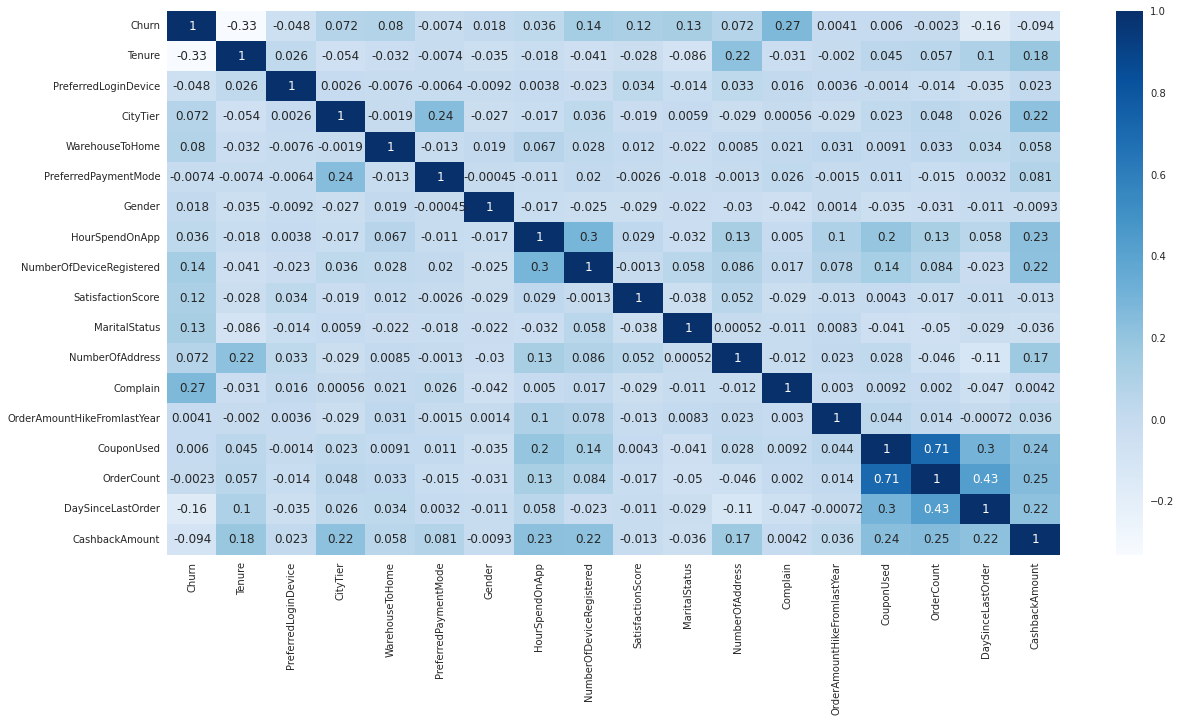

In [372]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [373]:
df_fix = df[["Churn","CityTier","WarehouseToHome","PreferredLoginDevice",\
             "PreferredPaymentMode","Complain","SatisfactionScore","Gender","MaritalStatus"]]
df = df_fix
df

,Churn,CityTier,WarehouseToHome,PreferredLoginDevice,PreferredPaymentMode,Complain,SatisfactionScore,Gender,MaritalStatus
0,1,3,6,1,2,1,2,0,2
1,1,1,8,1,4,1,3,1,2
2,1,1,30,1,2,1,3,1,2
3,1,3,15,1,2,0,5,1,2
4,1,1,12,1,1,0,5,1,2
...,...,...,...,...,...,...,...,...,...
5625,0,1,30,0,1,0,1,1,1
5626,0,1,13,1,1,0,5,1,1
5627,0,1,11,1,2,1,4,1,1
5628,0,3,9,0,1,0,4,1,1


In [374]:
# One-Hot encoding using dummies
# df = pd.get_dummies(df_fix)
# df

# Train test Split

In [375]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=75)

# Standardization

In [376]:
#Dikarenakan banyak outlier pada data maka gunakan RobustScaler
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [377]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,CityTier,WarehouseToHome,PreferredLoginDevice,PreferredPaymentMode,Complain,SatisfactionScore,Gender,MaritalStatus
0,0.0,0.2,0.0,0.0,1.0,0.5,0.0,1.0
1,0.0,-0.1,-1.0,-1.0,0.0,0.0,-1.0,0.0
2,1.0,-0.1,0.0,0.0,1.0,-1.0,0.0,0.0
3,0.0,0.1,0.0,2.0,0.0,1.0,-1.0,0.0
4,0.0,0.5,0.0,-1.0,0.0,-0.5,-1.0,1.0


# Imbalanced Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


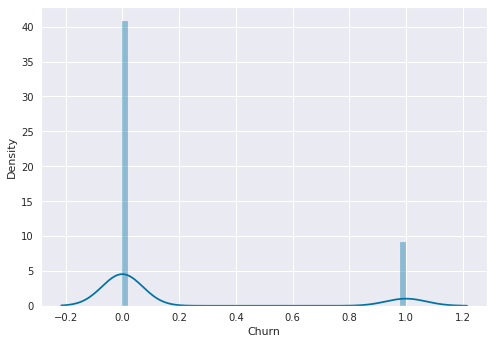

In [378]:
sns.distplot(df_fix['Churn'])

In [379]:
# Label proportion
pd.Series(y_train).value_counts()

0    2795
1     646
Name: Churn, dtype: int64

# Undersampling

In [380]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [381]:
pd.Series(y_under).value_counts()

0    646
1    646
Name: Churn, dtype: int64

# Oversampling

In [382]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [383]:
pd.Series(y_over).value_counts()

0    2795
1    2795
Name: Churn, dtype: int64

# Modelling LazyClassifier

In [384]:
# ! pip install lazypredict

In [385]:
# from lazypredict.Supervised import LazyClassifier

In [386]:
# clf = LazyClassifier(predictions=True)
# models , predictions = clf.fit(X_over, X_test, y_over, y_test)
# models

In [387]:
# predictions

#  Modelling Pycaret

In [388]:
# ! pip install pycaret

In [389]:
# from pycaret.classification import *
# s = setup(df_fix, target = 'Churn')

In [390]:
# best = compare_models()

In [391]:
# print(best)

# Analyze Model

In [392]:
# evaluate_model(best)

In [393]:
# plot_model(best, plot = 'auc')

In [394]:
# plot_model(best, plot = 'confusion_matrix')

# Predictions

In [395]:
# predict_model(best)

In [396]:
# predictions = predict_model(best, data=df_fix)
# predictions.head()activate

# Modelling

In [397]:
pip install yellowbrick

In [398]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import DiscriminationThreshold 

In [399]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='error')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

# Cross Validation

In [400]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [401]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.941176,0.934641,0.950980,0.945474,0.948746
RandomForestClassifier,0.946623,0.941176,0.955338,0.953108,0.956379
AdaBoostClassifier,0.825708,0.839869,0.833333,0.833152,0.845147
ExtraTreesClassifier,0.947712,0.949891,0.956427,0.957470,0.957470
GradientBoostingClassifier,0.852941,0.850763,0.851852,0.851690,0.854962
BaggingClassifier,0.938998,0.938998,0.948802,0.935660,0.933479
KNeighborsClassifier,0.906318,0.899782,0.918301,0.909487,0.912759
LogisticRegression,0.833333,0.828976,0.834423,0.836423,0.837514
GaussianNB,0.833333,0.835512,0.838780,0.839695,0.836423
SVC,0.815904,0.815904,0.815904,0.815703,0.816794


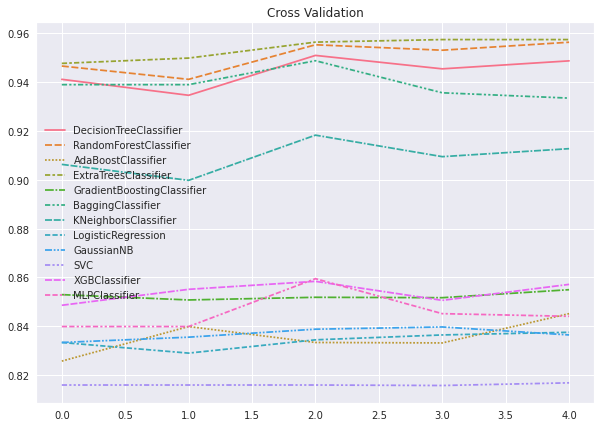

In [402]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.lineplot(data=df_cv_result.T)
plt.title('Cross Validation')
plt.show()

In [403]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1
    
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1
    
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
ExtraTreesClassifier,0.953794,0.004152
RandomForestClassifier,0.950525,0.005775
DecisionTreeClassifier,0.944204,0.005810
BaggingClassifier,0.939187,0.005245
KNeighborsClassifier,0.909329,0.006205
XGBClassifier,0.853967,0.003776
GradientBoostingClassifier,0.852442,0.001438
MLPClassifier,0.845684,0.007222
GaussianNB,0.836749,0.002285
AdaBoostClassifier,0.835442,0.006607


# Cross Validation for Some Metrics

In [404]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
skfold = StratifiedKFold(n_splits=5)

# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [405]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,ExtraTreesClassifier,0.399158,0.054694,0.953794,0.930266,0.810425,0.865876
1,RandomForestClassifier,0.446079,0.061167,0.949871,0.907725,0.810440,0.855904
2,DecisionTreeClassifier,0.017842,0.018196,0.945293,0.894689,0.797372,0.842608
3,BaggingClassifier,0.155909,0.029255,0.938100,0.869738,0.780797,0.822506
4,KNeighborsClassifier,0.015144,0.129931,0.909329,0.877990,0.588863,0.704829
5,XGBClassifier,0.500553,0.011930,0.853967,0.816393,0.267794,0.402567
6,GradientBoostingClassifier,0.603288,0.021172,0.852442,0.792332,0.270132,0.402062
7,MLPClassifier,7.713991,0.028104,0.845467,0.733244,0.271288,0.387637
8,GaussianNB,0.018364,0.017002,0.836749,0.710906,0.190786,0.300303
9,AdaBoostClassifier,0.236673,0.048172,0.835442,0.662874,0.214490,0.324057


# Test accuracy

In [406]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_over, y_over)
    # accuracy for training set
    train_score.append(model.score(X_over, y_over))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [407]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
RandomForestClassifier,0.984794,0.931125,0.053670
ExtraTreesClassifier,0.984794,0.930253,0.054541
DecisionTreeClassifier,0.984794,0.899738,0.085056
BaggingClassifier,0.981753,0.915432,0.066322
KNeighborsClassifier,0.942039,0.861378,0.080662
MLPClassifier,0.873882,0.815170,0.058712
GradientBoostingClassifier,0.847943,0.795990,0.051953
XGBClassifier,0.840250,0.785527,0.054723
SVC,0.800537,0.762860,0.037677
AdaBoostClassifier,0.746869,0.728858,0.018012


# Comparation before after

Berdasarkan proses crosvalidasi dan uji akurasidiatas, kami memilih model **ExtraTreesClassifier**. hal itu dikarenakan memiliki nilai akurasi dan recall yang tertinggi.

In [408]:
# Fit classifier
etc.fit(X_over, y_over)

# predict test set
y_pred_def = etc.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((etc.score(X_over, y_over) * 100), 2)
test_score_def = round((etc.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 98.48%
Test Accuracy : 93.03%
Precision Score : 83.15%
Recall Score : 74.75%
F1 Score : 78.72%


# Model Evaluation

# Confusion Matrix


True Positives(TP) =  919

True Negatives(TN) =  148

False Positives(FP) =  30

False Negatives(FN) =  50


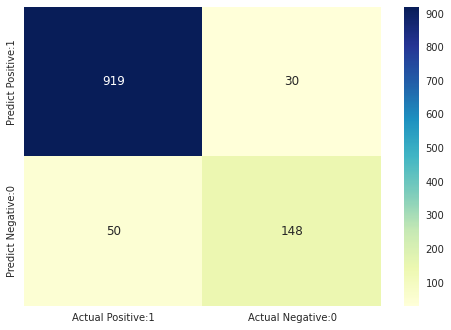

In [409]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred_def)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


# print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

In [410]:
# Classification report model
cr = classification_report(y_test, y_pred_def)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       949
           1       0.83      0.75      0.79       198

    accuracy                           0.93      1147
   macro avg       0.89      0.86      0.87      1147
weighted avg       0.93      0.93      0.93      1147



# Precision Recall and ROC Curve

In [411]:
# Precision Recall Curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

y_pred = etc.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=etc.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

In [412]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label= etc.classes_[1])
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

FPR
[0.         0.01369863 0.01369863 0.01475237 0.01685985 0.01685985
 0.01685985 0.01685985 0.01685985 0.01685985 0.01685985 0.01685985
 0.01685985 0.01685985 0.01685985 0.01685985 0.01685985 0.01685985
 0.01791359 0.01791359 0.01791359 0.01896733 0.01896733 0.02002107
 0.02002107 0.02002107 0.02002107 0.02212856 0.02212856 0.02212856
 0.0231823  0.02423604 0.02423604 0.02528978 0.02528978 0.02528978
 0.02634352 0.02634352 0.02739726 0.02739726 0.03161222 0.03161222
 0.04425711 0.04531085 0.04741834 0.04952582 0.05057956 0.0516333
 0.0516333  0.0516333  0.05268704 0.05584826 0.056902   0.056902
 0.06427819 0.06638567 0.06849315 0.07270811 0.07376185 0.07797682
 0.08219178 0.08429926 0.08640674 0.08640674 0.08746048 0.09167545
 0.09799789 0.09905163 0.10115911 0.10221286 0.10642782 0.11169652
 0.11801897 0.12539515 0.12644889 0.13066386 0.1317176  0.13487882
 0.13593256 0.14330875 0.14436249 0.16227608 0.16438356 0.17492097
 0.17808219 0.19072708 0.19283456 0.1938883  0.20337197 0.204

ROC AUC : 0.9208


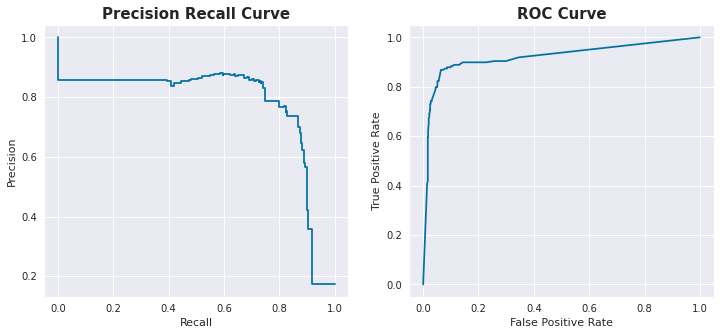

In [413]:
# roc auc score
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

# Feature Importance

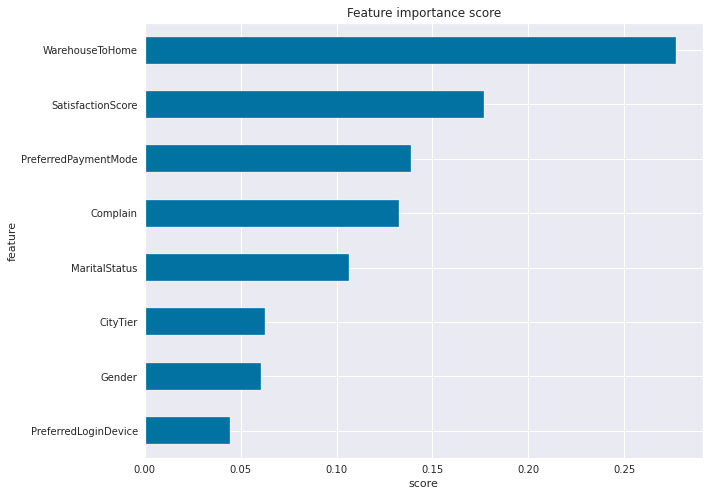

In [414]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('Feature importance score')
    
show_feature_importance(etc )